# # <div style="text-align:center"> Τεχνικές Εξόρυξης Δεδομένων: 1η Άσκηση  </div>

### <div style="text-align:center">  Παναγιώτοπουλος Γεώργιος **1115201700113** </div>

## 1. Προεπεξεργασία/Καθάρισμα:
Ελέγξτε αν υπάρχουν τιμές που λείπουν στα δεδομένα και
χειριστείτε τις ανάλογα, μετατρέψτε στήλες που αφορούν ημερομηνίες σε DateTime
objects και ελέγξτε αν υπάρχουν και κάποια χαρακτηριστικά dtype: object τα οποία
μπορείτε να κωδικοποιήσετε/μετατρέψετε σε αριθμητικές τιμές (5%).

In [89]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

print(pd.read_csv('marketing_campaign.csv'))

     ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0     5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...                                                                                                                                                                                                                                                                                                                                                  
1     2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...                                                                                                                                                             

In [90]:
#Data is seperated by tabs
data = pd.read_csv('marketing_campaign.csv',sep='\t')
column_names = list(data.columns)

In [91]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Βλέπουμε οτι το πεδίο income περιέχει ```24``` NULL τιμες. Μικρό ποσοστό, επομένως θα μπορούσαμε να τις γεμήσουμε με τον μέσο όρο. 

In [92]:
income_median = data['Income'].median()
data['Income'].fillna(income_median, inplace=True)

In [93]:
income_null_rows = data['Income'].isnull()
print(income_null_rows)

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Name: Income, Length: 2240, dtype: bool


Η λύση μας δούλεψε. Πλέον δεν έχουμε καθόλου NULL τιμες. <br>
Ας δούμε και ποιο column θα άξιζε να μετατρέψουμε σε DateTime.

In [94]:
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [95]:
data['Dt_Customer'].dtype

dtype('O')

Βλέπουμε ότι αν και το format του Dt_Customer field, μοιάζει πάρα πολύ με DateTime, δεν είναι. <br>
Συνεπώς ας το μετατρέψουμε:

In [96]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'],format='%d-%m-%Y')
print(data['Dt_Customer'])

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]


## 2. 
Εκτυπώστε τις μοναδικές τιμές στα κατηγορικά χαρακτηριστικά Marital_Status και
Education για να αποκτήσετε μια πιο σαφή εικόνα των δεδομένων. Αλλάξτε τις τιμές
[Alone,Absurd,YOLO] των Marital_Status με την τιμή ‘Single’. Χρησιμοποιήστε όποιο
τύπο γραφήματος θέλετε για να παρουσιάσετε το πλήθος των τιμών σε κάθε κατηγορία.

In [97]:
unique_values_ma = data['Marital_Status'].unique()
unique_values_ed = data['Education'].unique()
print(unique_values_ma,"\n",unique_values_ed)

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO'] 
 ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [98]:
replace_dict = {'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'}
data['Marital_Status'] = data['Marital_Status'].replace(replace_dict)
unique_values_ma = data['Marital_Status'].unique()
print(unique_values_ma)

['Single' 'Together' 'Married' 'Divorced' 'Widow']


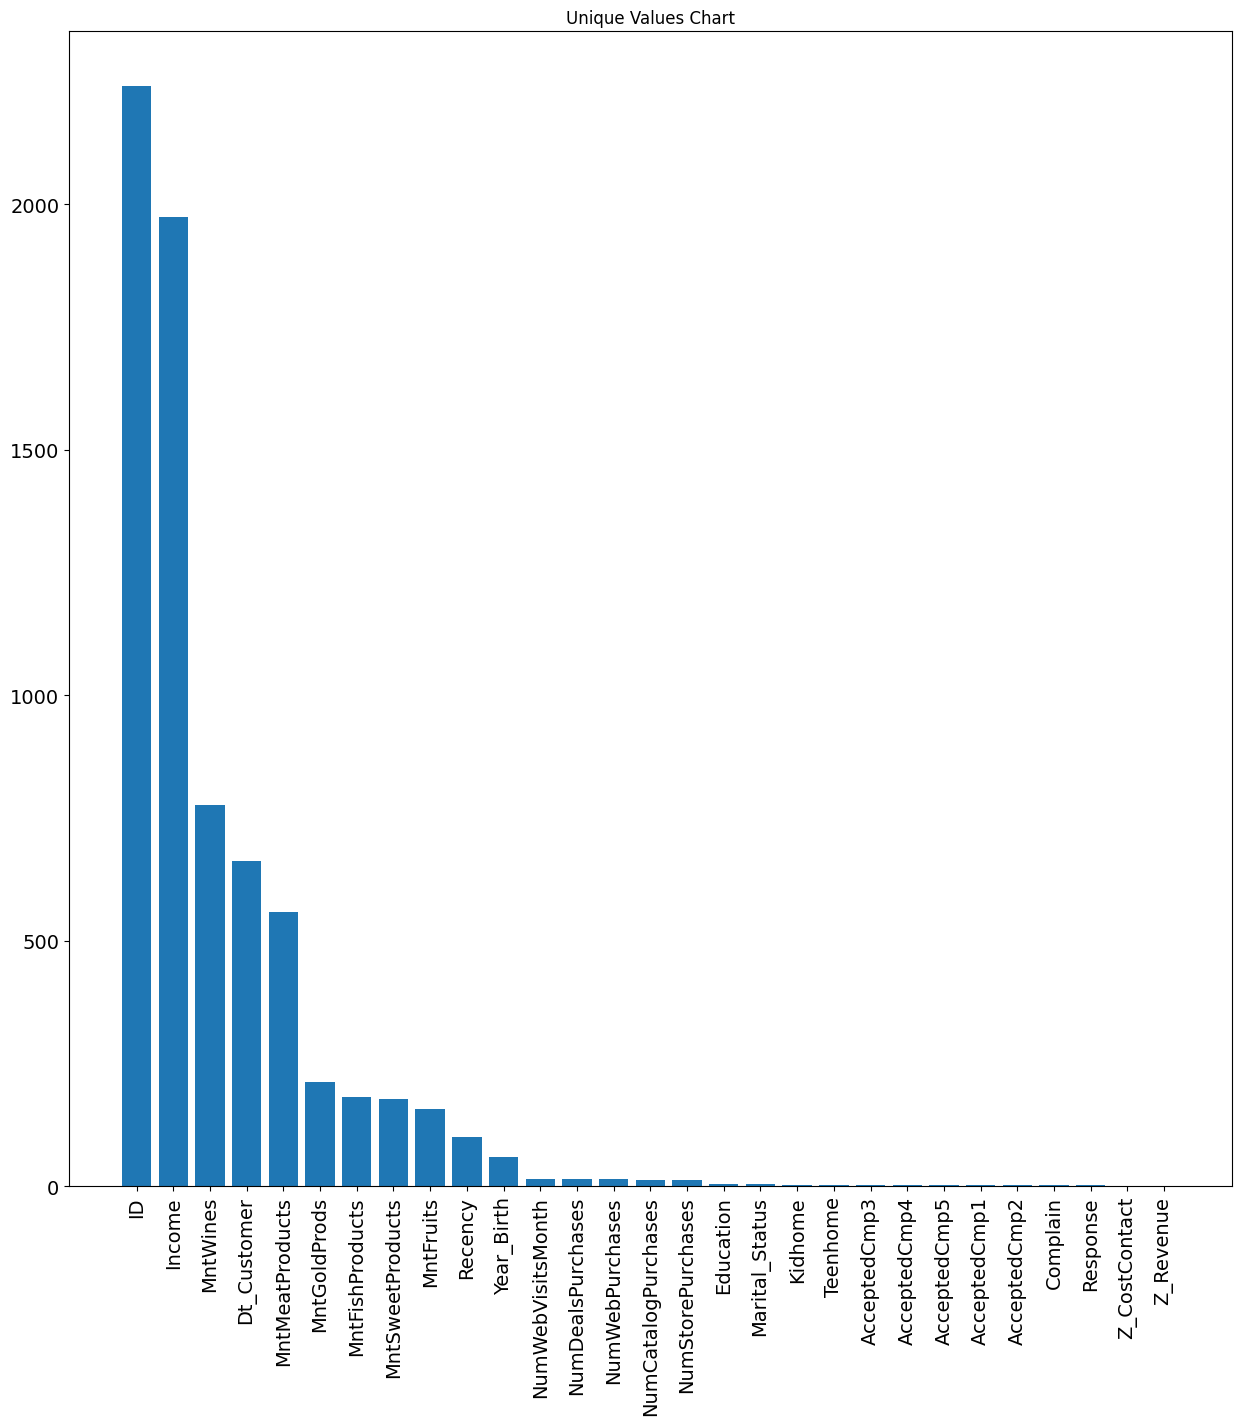

In [99]:
uniquedata = []
for column in column_names:
    unique_values = data[column].unique()
    t = (column, len(unique_values))
    uniquedata.append(t)

#Looks a lot better sorted
sorted_udata = sorted(uniquedata, key=lambda x: x[1], reverse=True)

labels = [t[0] for t in sorted_udata]
values = [t[1] for t in sorted_udata]

fig, ax = plt.subplots(figsize=(15, 15))
ax.bar(labels,values)
ax.set_title('Unique Values Chart')
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=90)
plt.show()